Submitted by: M. Zubair Adnan i220789
Protect Lab Internship Recruitment Task 1

Required Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Load the Data

In [3]:
df = pd.read_csv('employee_behavior_timeseries.csv')
df.head()

,employee_id,week_number,average_meeting_hours,code_commits_per_week,messages_sent_slack,screen_active_minutes,sentiment_score,timezone_alignment,is_disengaging,disengaged
0,E0001,1,9.2,2,48,331.8,0.00,1,0,NaN
1,E0001,2,10.7,3,47,332.3,0.00,1,0,NaN
2,E0001,3,9.1,0,48,333.4,2.56,1,0,NaN
3,E0001,4,10.2,3,48,332.2,0.95,1,0,NaN
4,E0001,5,10.1,2,47,332.6,0.00,1,0,NaN


Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            600 non-null    object 
 1   week_number            600 non-null    int64  
 2   average_meeting_hours  600 non-null    float64
 3   code_commits_per_week  600 non-null    int64  
 4   messages_sent_slack    600 non-null    int64  
 5   screen_active_minutes  600 non-null    float64
 6   sentiment_score        600 non-null    float64
 7   timezone_alignment     600 non-null    int64  
 8   is_disengaging         600 non-null    int64  
 9   disengaged             0 non-null      float64
dtypes: float64(4), int64(5), object(1)
memory usage: 47.0+ KB


In [5]:
# since the disengaged column is completely null
# it is thus assumed that the is_disengaging column is the target column
# dropping the disengaged column

df.drop('disengaged', axis=1, inplace=True)

In [6]:
df.isnull().sum()

employee_id              0
week_number              0
average_meeting_hours    0
code_commits_per_week    0
messages_sent_slack      0
screen_active_minutes    0
sentiment_score          0
timezone_alignment       0
is_disengaging           0
dtype: int64

In [7]:
# verify that the relevant column has been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            600 non-null    object 
 1   week_number            600 non-null    int64  
 2   average_meeting_hours  600 non-null    float64
 3   code_commits_per_week  600 non-null    int64  
 4   messages_sent_slack    600 non-null    int64  
 5   screen_active_minutes  600 non-null    float64
 6   sentiment_score        600 non-null    float64
 7   timezone_alignment     600 non-null    int64  
 8   is_disengaging         600 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 42.3+ KB


In [8]:
df.describe()

,week_number,average_meeting_hours,code_commits_per_week,messages_sent_slack,screen_active_minutes,sentiment_score,timezone_alignment,is_disengaging
count,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000
mean,3.50000,11.298667,4.241667,42.490000,297.729667,0.416600,0.73000,0.200000
std,1.70925,2.768979,2.539819,9.560277,64.221984,0.597517,0.44433,0.400334
min,1.00000,2.900000,0.000000,15.000000,93.700000,0.000000,0.00000,0.000000
25%,2.00000,9.775000,2.000000,37.000000,271.000000,0.000000,0.00000,0.000000
50%,3.50000,11.300000,4.000000,44.000000,313.250000,0.065000,1.00000,0.000000
75%,5.00000,13.100000,6.000000,49.000000,339.900000,0.662500,1.00000,0.000000
max,6.00000,18.600000,13.000000,60.000000,428.500000,3.390000,1.00000,1.000000


In [9]:
# using MinMaxScaler to bring the sentiment_score to the (-1, 1) range 
# as specified in the instructions document

scaler = MinMaxScaler(feature_range=(-1, 1))
df[['sentiment_score']] = scaler.fit_transform(df[['sentiment_score']])
df.describe()

,week_number,average_meeting_hours,code_commits_per_week,messages_sent_slack,screen_active_minutes,sentiment_score,timezone_alignment,is_disengaging
count,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000
mean,3.50000,11.298667,4.241667,42.490000,297.729667,-0.754218,0.73000,0.200000
std,1.70925,2.768979,2.539819,9.560277,64.221984,0.352517,0.44433,0.400334
min,1.00000,2.900000,0.000000,15.000000,93.700000,-1.000000,0.00000,0.000000
25%,2.00000,9.775000,2.000000,37.000000,271.000000,-1.000000,0.00000,0.000000
50%,3.50000,11.300000,4.000000,44.000000,313.250000,-0.961652,1.00000,0.000000
75%,5.00000,13.100000,6.000000,49.000000,339.900000,-0.609145,1.00000,0.000000
max,6.00000,18.600000,13.000000,60.000000,428.500000,1.000000,1.00000,1.000000


EDA is as following

<Axes: xlabel='is_disengaging'>

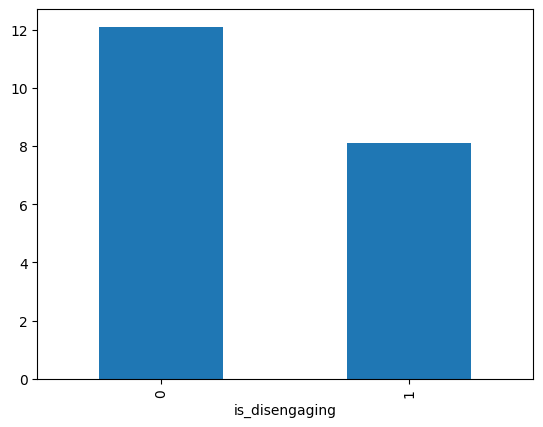

In [10]:
df.groupby('is_disengaging')['average_meeting_hours'].mean().plot(kind='bar')

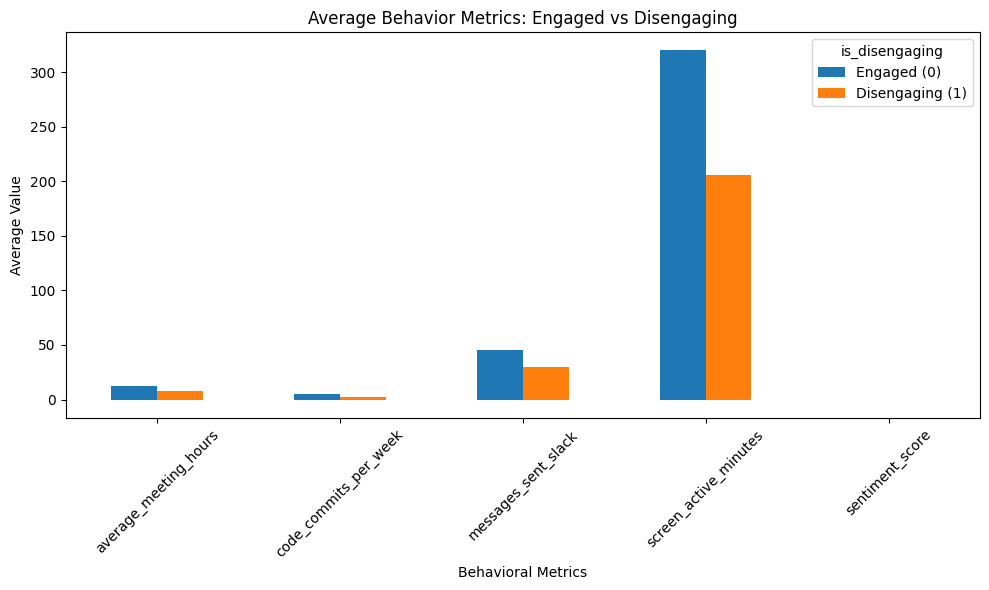

In [11]:
grouped_means = df.groupby('is_disengaging')[
    ['average_meeting_hours', 'code_commits_per_week', 
     'messages_sent_slack', 'screen_active_minutes', 
     'sentiment_score'] ].mean()

# print(grouped_means)

grouped_means = grouped_means.T

# print(grouped_means)

grouped_means.plot(kind='bar', figsize=(10, 6))

plt.title('Average Behavior Metrics: Engaged vs Disengaging')
plt.ylabel('Average Value')
plt.xlabel('Behavioral Metrics')
plt.xticks(rotation=45)
plt.legend(title='is_disengaging', labels=['Engaged (0)', 'Disengaging (1)'])
plt.tight_layout()
plt.show()


In [13]:
weekly_trends = df.groupby(['week_number', 'is_disengaging'])[
    ['average_meeting_hours', 'code_commits_per_week',
     'messages_sent_slack', 'screen_active_minutes',
     'sentiment_score']
].mean().reset_index()

# Split by is_disengaging
engaged = weekly_trends[weekly_trends['is_disengaging'] == 0]
disengaging = weekly_trends[weekly_trends['is_disengaging'] == 1]

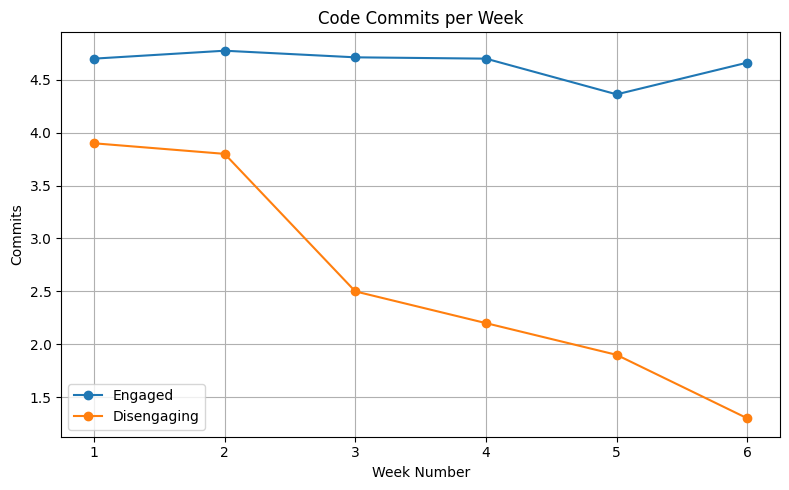

In [14]:
plt.figure(figsize=(8, 5))

plt.plot(engaged['week_number'], engaged['code_commits_per_week'], marker='o', label='Engaged')
plt.plot(disengaging['week_number'], disengaging['code_commits_per_week'], marker='o', label='Disengaging')

plt.title('Code Commits per Week')
plt.xlabel('Week Number')
plt.ylabel('Commits')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 7))
plt.tight_layout()
plt.show()

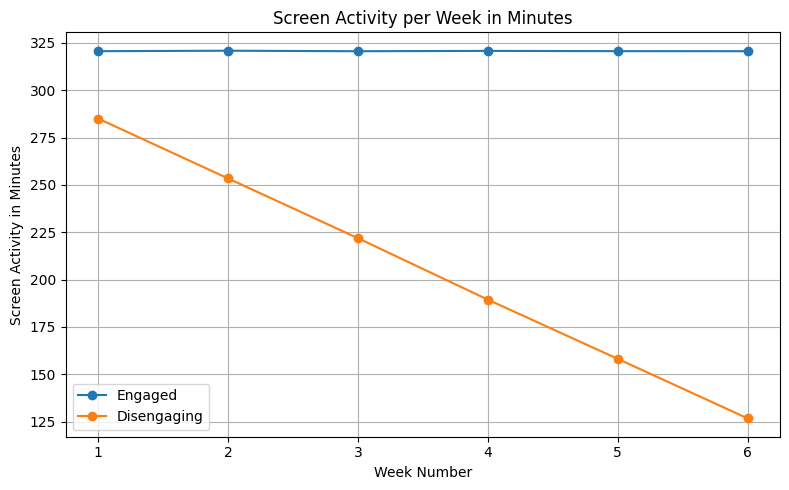

In [15]:
plt.figure(figsize=(8, 5))

plt.plot(engaged['week_number'], engaged['screen_active_minutes'], marker='o', label='Engaged')
plt.plot(disengaging['week_number'], disengaging['screen_active_minutes'], marker='o', label='Disengaging')

plt.title('Screen Activity per Week in Minutes')
plt.xlabel('Week Number')
plt.ylabel('Screen Activity in Minutes')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 7))
plt.tight_layout()
plt.show()

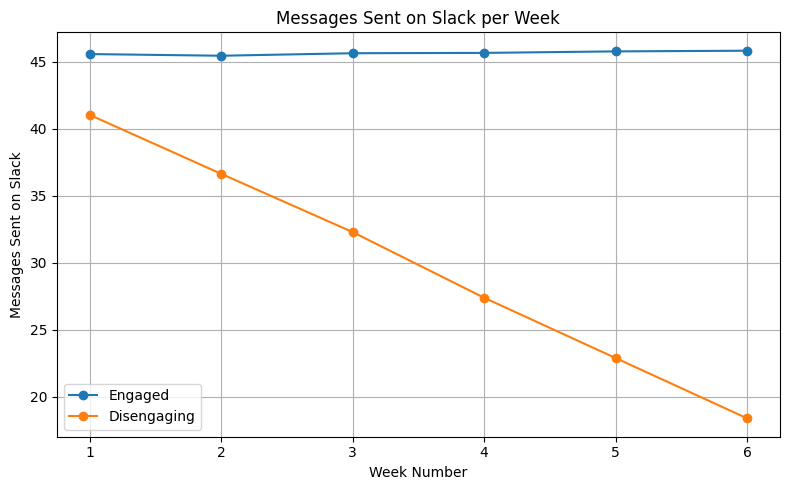

In [17]:
plt.figure(figsize=(8, 5))

plt.plot(engaged['week_number'], engaged['messages_sent_slack'], marker='o', label='Engaged')
plt.plot(disengaging['week_number'], disengaging['messages_sent_slack'], marker='o', label='Disengaging')

plt.title('Messages Sent on Slack per Week')
plt.xlabel('Week Number')
plt.ylabel('Messages Sent on Slack')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 7))
plt.tight_layout()
plt.show()

Model Training and Creation

Solution A

Explanation:

As we know, in a classical Time Series Problem, we predict the future using the past data.
I have done the same in this method. What I have done is that I have trained a model, that on
the basis of first four weeks predicts whether an employee will become disengaged in the fifth or sixth week.

I did this but first selecting the data of each employee for the first four weeks, aggregated all of the metrics so that I have one row per employee. I then extracted the target label from either the fifth or sixth week, 1 if the employee became disengaged in either of the weeks otherwise 0. I then appended the target label with the aggregated data of each employee. Then using sklearn, generated test and train splits and trained a RandomForest on it. Reason for using RandomForest is that it is fast and offered high prediction accuracy. 

In [12]:
features_weeks = df[df['week_number'] <= 4]

In [13]:
agg_df = features_weeks.groupby('employee_id').agg({
    'average_meeting_hours': ['mean', 'min', 'max'],
    'code_commits_per_week': ['mean', 'min', 'max'],
    'messages_sent_slack': ['mean', 'min', 'max'],
    'screen_active_minutes': ['mean', 'min', 'max'],
    'sentiment_score': ['mean', 'min', 'max'],
})
agg_df.columns = ['_'.join(col) for col in agg_df.columns]
agg_df.reset_index(inplace=True)

In [14]:
label_weeks = df[df['week_number'].isin([5, 6])]
label_df = label_weeks.groupby('employee_id')['is_disengaging'].max().reset_index()

In [15]:
final_df = agg_df.merge(label_df, on='employee_id')

In [18]:
X = final_df.drop(columns=['employee_id', 'is_disengaging'])
y = final_df['is_disengaging']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17  0]
 [ 0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [22]:
importances = clf.feature_importances_
feature_names = X.columns

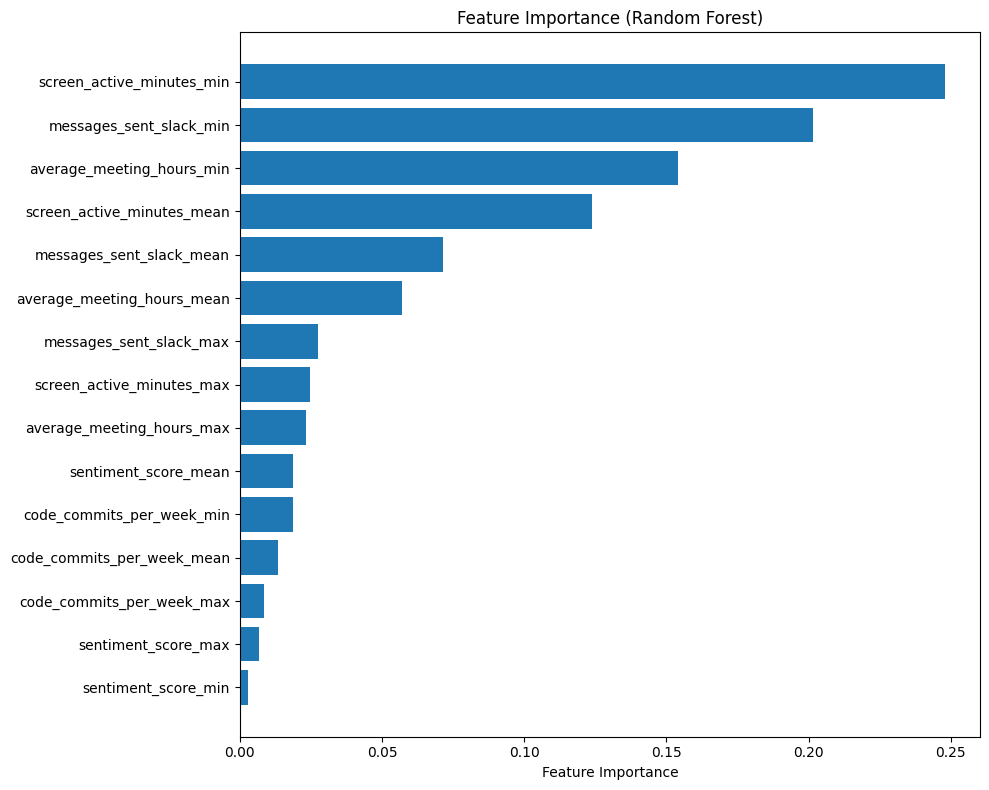

In [ ]:
# sort by importance
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

In [ ]:
# Antoher way to train the Model as well
# Using K-fold cross validation

clf = RandomForestClassifier(random_state=42)

# 5-fold stratified cross-validation
scores = cross_val_score(clf, X, y, cv=5, scoring='f1')  # or 'accuracy', 'precision', etc.
print("F1 scores per fold:", scores)
print("Average F1 score:", scores.mean())

Solution B

In this method, I have treated the problem as a classification problem. What I have done is that I have trained a model, that on the all of the weeks predicts whether an employee will become disengaged or not. 

I did this by first selecting the target label of each employee. 1 if the employee became disengaged in any week otherwise 0. Then simply aggregated the metrics of each employee for all the weeks and appened the target label. Then using sklearn, generated test and train splits and trained a RandomForest on it. Reason for using RandomForest is that it is fast and offered high prediction accuracy. 

This solution is more of a classification one. The idea is that we can provide the relevant metrics of a window to the model and it will classify the employee as being engaged or disengaged.

In [ ]:
# if employee disengaged in *any* week (1–6), mark them as 1
label_df = df.groupby('employee_id')['is_disengaging'].max().reset_index()

In [26]:
agg_df = df.groupby('employee_id').agg({
    'average_meeting_hours': ['mean', 'min', 'max'],
    'code_commits_per_week': ['mean', 'min', 'max'],
    'messages_sent_slack': ['mean', 'min', 'max'],
    'screen_active_minutes': ['mean', 'min', 'max'],
    'sentiment_score': ['mean', 'min', 'max'],
})
agg_df.columns = ['_'.join(col) for col in agg_df.columns]
agg_df.reset_index(inplace=True)

In [27]:
final_df = agg_df.merge(label_df, on='employee_id')

In [28]:
X = final_df.drop(columns=['employee_id', 'is_disengaging'])
y = final_df['is_disengaging']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
clf2 = RandomForestClassifier(random_state=42)
clf2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = clf2.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17  0]
 [ 0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
# feature importance
# how much a feature/metric contributes to the classification

importances = clf2.feature_importances_
feature_names = X.columns

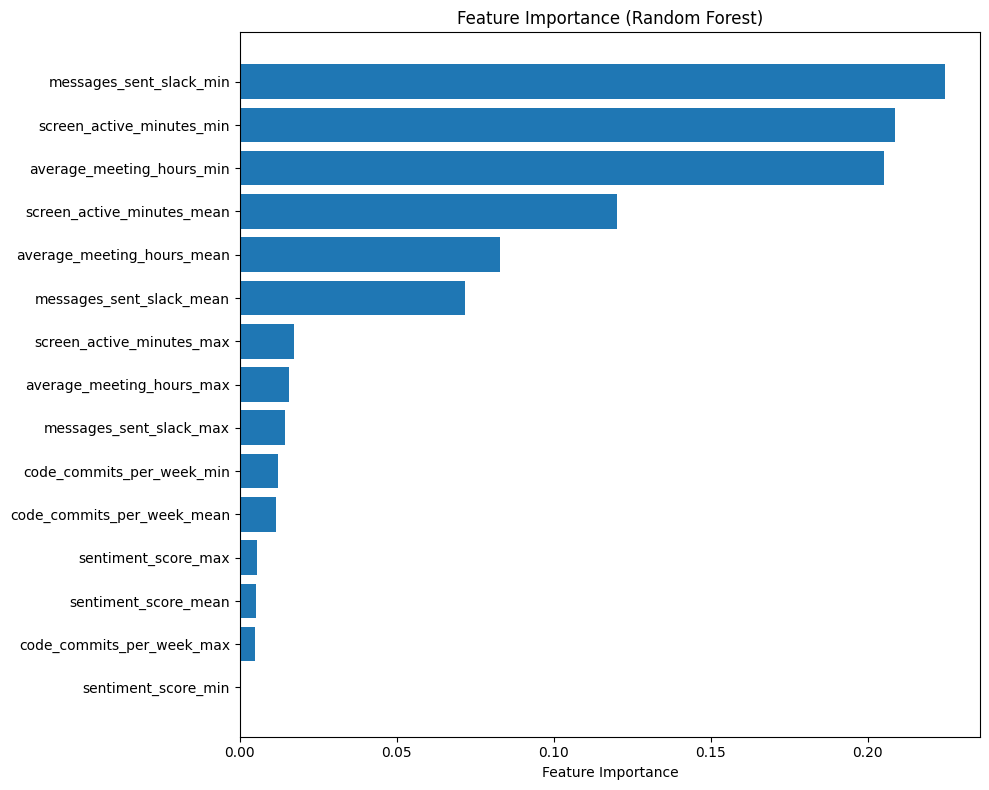

In [32]:
# Sort by importance
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

# Explainability and Ethics


## 1. Top Contribtuing Features

By using the methods of the RandomForestClassifier, we can determine the metrics that contribute most to the prediction/classification.

In case of both methods, the top contributing features are (in descending order)
1. Minimum Number of Messages sent on Slack
2. Minimum Screen Activity in Minutes
3. Minimum Average Meeting hours

The above metrics show that if their values keep on decreasing each week, the employee has a high probability of becoming disengaged.

## 2. Ethical Concerns

### Negatives:
1. I believe that dataset size is too little for these models to be robust and generalized.
2. This can lead to micromanagement on the end of HR and Project Manager.
3. In these particular models, the most contributing features are messages sent on slac, screen activity and average meeting hours. The problem with this is that these are symptoms and not causes. In order to increase employee retention, cause need to be studied.
4. Does not consider the fact the productivity is not directly proportional to time spent in meetings or screen activity. You can still be productive whilst reducing screen time and so on

### Positives:
1. The prediction model developed in method A can be used for intervention. At the end of the fourth week, the employee metrics can be provided to the model and it can be used to predict whether they will leave or not. Hence, in can be used for intervention and address the problems of the employee before they actually leave.

# Post-Task Reflection Questions

### 1. Top Contribtuing Features

By using the methods of the RandomForestClassifier, we can determine the metrics that contribute most to the prediction/classification.

In case of both solutions, the top contributing features are (in descending order):
1. Minimum Number of Messages sent on Slack
2. Minimum Screen Activity in Minutes
3. Minimum Average Meeting hours

The above metrics show that if their values keep on decreasing each week, the employee has a high probability of becoming disengaged.

The reasoning behind the metrics could be that as the employee starts take less interest in the company, they participate less in group discussions, less screen activity and attend fewer meetings. They perhaps, start to look elsewhere and dedicate their time to job hunting or personal work. Hence, become disengaged in the end.

### 2. How did I process the Time Series Nature of the Data

1. Performed the relevant data pre-processing, such as dropping null column, bringing metric values within the specified range and checking for null values.

2. Then performed EDA by grouping data on disengaging and weekly basis and visualizing the trends etc.

3. Then for model training, as suggested in the given document, I aggregated the data of six weeks of each employee into a single example, as a result in the end I had one row per employee. I can not logically state the reasoning, but apparently this is a requirement for time series model training. Then I performed the train/test splits and trained a RandomForestClassifier on it and showed the scores.

### 3. Patterns I noticed

After grouping the data on a weekly and disengaging basis I noticed several trends a few of which are:

1. For employees who remained engaged till the end had a higher and consistent number of code commits per week, whereas employees who became disenaged had their code commits drop with each week. That is the average number of code commits by employees who become disengaged gradually decline with each week.

2. For employees who remained engaged till the end, had on average the same screen activity each week, whereas for the disengaged employees theri screen activity declined with each subsequent week.

3. The trend observed above was also obeserved in regards to messages sent on slack.

### 4. My opinion on using this in an HR setting

I would use the Solution A model for intervention. If the employee is predicted to be disengaged afetr the fourth week, I will discuss the problems they are facing and try to resolve this.

I will NOT use it for micro management and will not force the employees to increase their slack acitivity, screen time and such metrics by force. This will only further inflate the problem and perhaps even break the model as employees will find a way to artificially increase their metrics casuing less successful timely intervention.

### 5. Improvements

1. I believe the given dataset is too small. I would prefer a significantly larger dataset.
2. I would add more metrics as the current metrics are more of symptoms and not causes. So I would add metrics such as number of projects assigned, number of tasks completed on time, an employee's rating of their project maneger and so on.
